# Course Project: Data Science 439
By: Pranay Gupta & Abhishek Modoor (avm67)


### Data Collection:
1. NYC Yellow Taxi Trip Data: https://www.kaggle.com/edwinytleung/nyc-yellow-taxi-2015-sample-data
2. NYC Transit Subway Entrance And Exit Data: https://data.ny.gov/Transportation/NYC-Transit-Subway-Entrance-And-Exit-Data/i9wp-a4ja
3. NYC Yellow Taxi March 2018: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
4. Taxi Zone Lookup Table: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

### Part 2: Data Format Description
Included files are:
1. NYC_Transit_Subway_Entrance_And_Exit_Data.csv
2. train_2015.csv
3. yellow_tripdata_2018-03.csv
4. taxi+_zone_lookup.csv

The files are of CSV format. 

The NYC_Transit_Subway.csv contains data regarding the subway line, station name, station location (lat + lon) and the subway route used. It also provides key fields such as whether the station is an entrance or exit only station, allowing us to know if the station is a start or end point for subway rides. 
The most relevant attributes from this dataset would be the Entrance location, Exit only, Route options, and Station Name. The entrance location provides the street on which the subway station is located. Exit only tells us if it's a station you can only exit through. Route options tell you the different subway routes that are available at that particular station, and station name provides the name. 

The train_2015.csv contains yellow taxi rideshare data. Among the fields within the dataset are the pickup latitude + longtiude and dropoff latitude + longitude, pickup + dropoff datetime, total amount for ride, and passenger count (in order to determine how the ride amount would be split amongst the passengers). 
The most relevant attributes from this dataset would be the fields provided above. The pickup and dropoff latitude + longitude tells us the pickup and dropoff locations of the yellow taxi ride. The pickup + dropoff datetime tells us the time and date at which the ride occurred, the total amount gives us the price, and passenger count gives us the numbers of passengers that were in the taxi for that specific ride. 

The yellow_tripdata_2018-03.csv contains rideshare data like the one above with the same fields except, but provides the locationID of the pickup and dropoff for each ride. The relevant attribute from this dataset would be the fields provided above. But in addition, the PULocationID and DULocationID (pickup and dropoff locationID, respectively). 

The taxi+_zone_lookup.csv dataset contains the lookup table for identifying the Borough and Zone, given the locationID. This will be useful as it can help map the locationID's within the yellow_tripdata_2018-03 dataset for important visualizations and analysis. 





In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import numpy as np 

In [131]:
from utils import head
head('data/train_2015.csv')

['RateCodeID,VendorID,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_latitude,pickup_longitude,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance\n',
 '1,2,40.75556183,-73.99156952,0,12.5,0.3,0.5,1,2,40.73947906,-73.9765625,N,0,0,13.3,1/30/15 8:47,1/30/15 8:29,1.84\n',
 '1,1,40.75748444,-73.97045135,1,14.5,0.3,0.5,1,2,40.7806778,-73.98365021,N,0,0,16.3,1/20/15 16:22,1/20/15 16:00,2.4\n',
 '1,1,40.7727356,-73.96538544,0.5,4,0.3,0.5,1,2,40.77040863,-73.95786285,N,0,0,5.3,1/10/15 20:04,1/10/15 20:01,0.5\n',
 '1,1,40.83691025,-73.94270325,0.5,24.5,0.3,0.5,3,1,40.7388649,-74.00010681,N,5.2,0,31,1/8/15 2:22,1/8/15 2:01,8\n']

In [132]:
head('data/NYC_Transit_Subway_Entrance_And_Exit_Data.csv')

['Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,Route6,Route7,Route8,Route9,Route10,Route11,Entrance Type,Entry,Exit Only,Vending,Staffing,Staff Hours,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location\n',
 'BMT,4 Avenue,25th St,40.660397,-73.998091,R,,,,,,,,,,,Stair,YES,,YES,NONE,,FALSE,,FALSE,4th Ave,25th St,SW,40.660489,-73.99822,"(40.660397, -73.998091)","(40.660489, -73.99822)"\n',
 'BMT,4 Avenue,25th St,40.660397,-73.998091,R,,,,,,,,,,,Stair,YES,,YES,FULL,,FALSE,,FALSE,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"\n',
 'BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,,,,,,,,,,Stair,YES,,YES,FULL,,FALSE,,TRUE,4th Ave,36th St,NW,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"\n',
 'BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,,,,,,,,,,Stair,YES,,YES,FULL,,FALSE,,TRUE,4th 

In [133]:
head('data/yellow_tripdata_2018-03.csv')

['VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount\n',
 '\n',
 '1,2018-03-01 00:01:34,2018-03-01 00:01:43,1,.00,1,N,145,145,2,2.5,0.5,0.5,0,0,0.3,3.8\n',
 '1,2018-03-01 00:14:34,2018-03-01 00:28:13,1,3.30,1,N,151,244,1,13,0.5,0.5,2.85,0,0.3,17.15\n',
 '1,2018-03-01 00:51:25,2018-03-01 00:59:54,1,2.70,1,N,238,152,2,10,0.5,0.5,0,0,0.3,11.3\n']

In [134]:
tdf = pd.read_csv('data/train_2015.csv')

In [135]:
sdf = pd.read_csv('data/NYC_Transit_Subway_Entrance_And_Exit_Data.csv')

In [136]:
mdf = pd.read_csv('data/yellow_tripdata_2018-03.csv')

In [137]:
ldf = pd.read_csv('data/taxi+_zone_lookup.csv')

In [138]:
tdf.info

<bound method DataFrame.info of          RateCodeID  VendorID  dropoff_latitude  dropoff_longitude  extra  \
0                 1         2         40.755562         -73.991570    0.0   
1                 1         1         40.757484         -73.970451    1.0   
2                 1         1         40.772736         -73.965385    0.5   
3                 1         1         40.836910         -73.942703    0.5   
4                 1         1         40.741390         -73.992805    0.0   
...             ...       ...               ...                ...    ...   
1048570           1         1         40.732361         -74.003448    0.0   
1048571           1         2         40.765640         -73.970459    0.0   
1048572           1         1         40.760597         -73.983154    0.0   
1048573           1         1          0.000000           0.000000    0.0   
1048574           1         2         40.735821         -73.992188    0.0   

         fare_amount  improvement_surcharge

In [139]:
sdf.info

<bound method DataFrame.info of      Division               Line        Station Name  Station Latitude  \
0         BMT           4 Avenue             25th St         40.660397   
1         BMT           4 Avenue             25th St         40.660397   
2         BMT           4 Avenue             36th St         40.655144   
3         BMT           4 Avenue             36th St         40.655144   
4         BMT           4 Avenue             36th St         40.655144   
...       ...                ...                 ...               ...   
1863      IRT  White Plains Road          Simpson St         40.824073   
1864      IRT  White Plains Road          Simpson St         40.824073   
1865      IRT  White Plains Road  Wakefield-241st St         40.903125   
1866      IRT  White Plains Road  Wakefield-241st St         40.903125   
1867      IRT  White Plains Road  Wakefield-241st St         40.903125   

      Station Longitude Route1 Route2 Route3 Route4 Route5  ...    ADA  \
0    

In [140]:
mdf.info

<bound method DataFrame.info of          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2018-03-01 00:01:34   2018-03-01 00:01:43                1   
1               1  2018-03-01 00:14:34   2018-03-01 00:28:13                1   
2               1  2018-03-01 00:51:25   2018-03-01 00:59:54                1   
3               1  2018-03-01 00:00:01   2018-03-01 00:00:17                1   
4               1  2018-03-01 00:55:10   2018-03-01 00:56:36                1   
...           ...                  ...                   ...              ...   
9430371         2  2018-03-31 23:34:47   2018-03-31 23:55:17                5   
9430372         2  2018-03-31 23:02:38   2018-03-31 23:13:10                6   
9430373         2  2018-03-31 23:15:58   2018-03-31 23:30:29                6   
9430374         1  2018-03-31 23:05:37   2018-03-31 23:18:31                2   
9430375         1  2018-03-31 23:37:11   2018-03-31 23:56:53                1

### Part 3: Descriptive Statistics
#### Basic Analysis: train_2015.csv
Files are of CSV format

In [141]:
# Cleaning data: Drop rows with weird

#a = tdf.index[tdf['tolls_amount'] > 0] #no tolls required within manhattan
#tdf.drop(a,inplace=True)
b = tdf.index[tdf['dropoff_latitude']==0] #bad csv values 
tdf.drop(b,inplace=True)
c = tdf.index[tdf['pickup_longitude']==0] #bad csv values
tdf.drop(c,inplace=True)
d = tdf.index[tdf['trip_distance']==0] #bad csv values
tdf.drop(d,inplace=True)
#e = tdf.index[tdf['trip_distance'] > 15] #length of manhattan is approx. 14 miles 
#tdf.drop(e,inplace=True)
#f = tdf.index[tdf['total_amount']>60] #through yellow taxi cab calculator, north tip of manhattan to southern tip is approximately $43
#tdf.drop(f,inplace=True) #also contains bad values such as trip_distance = 0.6 but total_amount = 830.3
#g = tdf.index[tdf['fare_amount']>45]
#tdf.drop(g,inplace=True)

#bad csv values
h = tdf.index[tdf['fare_amount']<0]
tdf.drop(h,inplace=True)
i = tdf.index[tdf['total_amount']<0]
tdf.drop(i,inplace=True)
j = tdf.index[tdf['mta_tax']<=0]
tdf.drop(j,inplace=True)
k = tdf.index[tdf['tip_amount']<0]
tdf.drop(k,inplace=True)
l = tdf.index[tdf['tolls_amount']<0]
tdf.drop(l,inplace=True)
m = tdf.index[tdf['extra']<0]
tdf.drop(m,inplace=True)
n = tdf.index[tdf['trip_distance']<0]
tdf.drop(n,inplace=True)







In [142]:
# mean and std of total amount
total_amount_mean = tdf.total_amount.mean()
total_amount_std = tdf.total_amount.std()

total_amount_max = tdf.total_amount.max()
total_amount_min = tdf.total_amount.min()

ta = total_amount_max - total_amount_min
(total_amount_mean, total_amount_std, ta)
#(mean,std,range) of total_amount

(15.273211538290031, 11.726542341793213, 939.8)

In [143]:
# mean and std of fare_amount

fare_amount_mean = tdf.fare_amount.mean()
fare_amount_std = tdf.fare_amount.std()

# range of fare amount
fare_amount_max = tdf.fare_amount.max()
fare_amount_min = tdf.fare_amount.min()

ra = fare_amount_max - fare_amount_min
(fare_amount_mean,fare_amount_std, ra)

#(mean,std,range) of fare_amount

(12.279090485060934, 9.54376122745557, 400.0)

In [144]:
# mean and std of trip distance
trip_mean = tdf.trip_distance.mean()
trip_std = tdf.trip_distance.std()

(trip_mean,trip_std)
#(mean,std) of trip distance


(21.436327908273398, 11132.278371346665)

In [145]:
#mean and std passenger count per ride
passenger_mean = tdf.passenger_count.mean()
passenger_std = tdf.passenger_count.std()

(passenger_mean, passenger_std)

(1.6829892083475828, 1.3437440404921213)

#### Numerical variables: Taxi Dataset
    1. Plot distribution of payment types 
    2. Plot distribution of trip distance within certain numerical range 
    3. Plot distribution of total amount within certain numerical range 

In [146]:
!pip install altair

In [147]:
import altair as alt

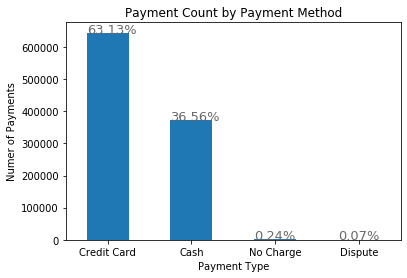

In [148]:
# 1. Plot distribution of payment types

#payment_type is a numeric code signifying how the passenger paid for the trip:

#1=Credit card
#2=Cash
#3=No charge
#4=Dispute

ax = tdf['payment_type'].value_counts().plot(kind='bar')
ax.set_title('Payment Count by Payment Method')
ax.set_xlabel('Payment Type')
ax.set_ylabel('Numer of Payments')
xlabels = ['Credit Card', 'Cash', 'No Charge', 'Dispute']
ax.set_xticklabels(xlabels, rotation=0)

totals = []

for i in ax.patches:
    totals.append(i.get_height())


total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()-.0, i.get_height()+.8, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='dimgrey')



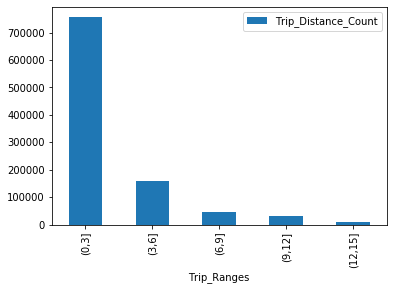

In [149]:
# 2. 
# Plot distribution of trip distance within certain numerical range
# range1 = 0 - 3
# range2 = 3.01 - 6.00
# range3 = 6.01 - 9.0
# range4 = 9.01 - 12.00
# range5 = 12.01 - 15.00

ranges = [0,3,6,9,12,15]
trip_dist = tdf.trip_distance
trip_groups = trip_dist.groupby(pd.cut(trip_dist, ranges)).count()
trip_groups_count = trip_groups.tolist()


trip_ranges = ['(0,3]','(3,6]','(6,9]','(9,12]','(12,15]']

dx = pd.DataFrame({'Trip_Ranges':trip_ranges, 'Trip_Distance_Count':trip_groups_count})

ax = dx.set_index('Trip_Ranges').loc[trip_ranges].plot(kind='bar')








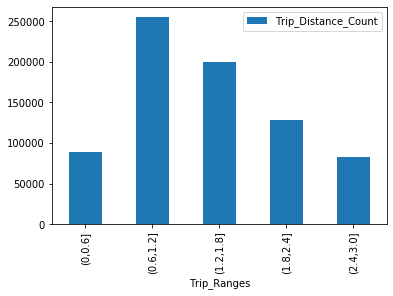

In [150]:
# 2a.
# Plot distribution of trip distance within 0 and 3 miles

# range1 = 0 - 0.6
# range2 = 0.61- 1.2
# range3 = 1.21 - 1.80
# range4 = 1.81 - 2.4
# range5 = 2.41 - 3.0

ranges = [0,0.6,1.2,1.8,2.4,3.0]
trip_dist = tdf.trip_distance

trip_groups = trip_dist.groupby(pd.cut(trip_dist,ranges)).count()
trip_groups_count = trip_groups.tolist()

trip_ranges = ['(0,0.6]','(0.6,1.2]','(1.2,1.8]','(1.8,2.4]','(2.4,3.0]']

dx = pd.DataFrame({'Trip_Ranges':trip_ranges, 'Trip_Distance_Count':trip_groups_count})

ax = dx.set_index('Trip_Ranges').loc[trip_ranges].plot(kind='bar')

# Most trips were between 0.6 and 1.2 miles, followed by 1.2 and 1.8 miles




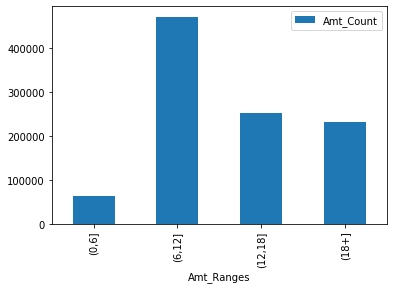

In [151]:
# 3. 
# Plot distribution of total amount
# range1 = 0 - 6.00
# range2 = 6.01 - 12.00
# range3 = 12.01 - 18.00
# range4 = 18.00 + 

ranges = [0,6,12,18]
trip_amt = tdf.total_amount

amt_groups = trip_amt.groupby(pd.cut(trip_amt,ranges)).count()
amt_groups_count = amt_groups.tolist()

plus18 = tdf[tdf['total_amount'] > 18]
plus18_count = len(plus18.index)
amt_groups_count.append(plus18_count)


amt_ranges = ['(0,6]','(6,12]','(12,18]','(18+]']

dx = pd.DataFrame({'Amt_Ranges':amt_ranges, 'Amt_Count':amt_groups_count})

ax = dx.set_index('Amt_Ranges').loc[amt_ranges].plot(kind='bar')









In [152]:
!pip install --upgrade folium

Requirement already up-to-date: folium in c:\users\gopim\anaconda3\lib\site-packages (0.10.1)


In [153]:
#heat map of occurrences within 2 miles of trip distance

import folium
import folium.plugins # The Folium Javascript Map Library

tdf1 = pd.read_csv('data/train_2015-1.csv')


a = tdf1.index[tdf1['tolls_amount'] > 0] #no tolls required within manhattan
tdf1.drop(a,inplace=True)
b = tdf1.index[tdf1['dropoff_latitude']==0] #bad csv values 
tdf1.drop(b,inplace=True)
c = tdf1.index[tdf1['pickup_longitude']==0] #bad csv values
tdf1.drop(c,inplace=True)
d = tdf1.index[tdf1['trip_distance']==0] #bad csv values
tdf1.drop(d,inplace=True)
e = tdf1.index[tdf1['trip_distance'] > 15] #length of manhattan is approx. 14 miles 
tdf1.drop(e,inplace=True)
f = tdf1.index[tdf1['total_amount']>60] #through yellow taxi cab calculator, north tip of manhattan to southern tip is approximately $43
tdf1.drop(f,inplace=True) #also contains bad values such as trip_distance = 0.6 but total_amount = 830.3
#g = tdf.index[tdf['fare_amount']>45]
#tdf.drop(g,inplace=True)

#bad csv values
h = tdf1.index[tdf1['fare_amount']<0]
tdf1.drop(h,inplace=True)
i = tdf1.index[tdf1['total_amount']<0]
tdf1.drop(i,inplace=True)
j = tdf1.index[tdf1['mta_tax']<=0]
tdf1.drop(j,inplace=True)
k = tdf1.index[tdf1['tip_amount']<0]
tdf1.drop(k,inplace=True)
l = tdf1.index[tdf1['tolls_amount']<0]
tdf1.drop(l,inplace=True)
m = tdf1.index[tdf1['extra']<0]
tdf1.drop(m,inplace=True)
n = tdf1.index[tdf1['trip_distance']<0]
tdf1.drop(n,inplace=True)


tdf1 = tdf1[tdf1['trip_distance'] <= 2]


ny_map = None
locations = list(zip(tdf1.pickup_latitude, tdf1.pickup_longitude))

heatmap = folium.plugins.HeatMap(data=tdf1[['pickup_latitude','pickup_longitude']].groupby(['pickup_latitude','pickup_longitude']).sum().reset_index().values.tolist())
for coord in locations:
    ny_map = folium.Map(location = [coord[0],coord[1]])
ny_map.add_child(heatmap)
ny_map

### Part 3: Descriptive Statistics

#### Basic Analysis: yellow_tripdata_2018-03.csv
Files are of CSV format

In [154]:
# Cleaning data: Drop rows with weird values

#d = mdf.index[mdf['trip_distance']==0] #bad csv values
#mdf.drop(d,inplace=True)
#e = tdf.index[tdf['trip_distance'] > 15] #length of manhattan is approx. 14 miles 
#tdf.drop(e,inplace=True)
#f = tdf.index[tdf['total_amount']>60] #through yellow taxi cab calculator, north tip of manhattan to southern tip is approximately $43
#tdf.drop(f,inplace=True) #also contains bad values such as trip_distance = 0.6 but total_amount = 830.3
#g = tdf.index[tdf['fare_amount']>45]
#tdf.drop(g,inplace=True)

#bad csv values
h = mdf.index[mdf['fare_amount']<=0]
mdf.drop(h,inplace=True)
i = mdf.index[mdf['total_amount']<=0]
mdf.drop(i,inplace=True)
j = mdf.index[mdf['mta_tax']<=0]
mdf.drop(j,inplace=True)
k = mdf.index[mdf['tip_amount']<0]
mdf.drop(k,inplace=True)
l = mdf.index[mdf['tolls_amount']<0]
mdf.drop(l,inplace=True)
m = mdf.index[mdf['extra']<0]
mdf.drop(m,inplace=True)
n = mdf.index[mdf['trip_distance']<=0]
mdf.drop(n,inplace=True)

# drop weird total amount values
a = mdf.index[mdf['total_amount']>=50000]
mdf.drop(a,inplace=True)









In [155]:
# mean and std of total amount
mdf.total_amount.describe()

count    9.336056e+06
mean     1.563985e+01
std      1.307919e+01
min      8.100000e-01
25%      8.300000e+00
50%      1.162000e+01
75%      1.716000e+01
max      4.026300e+03
Name: total_amount, dtype: float64

In [156]:
# mean and std of fare_amount

mdf.fare_amount.describe()


count    9.336056e+06
mean     1.239128e+01
std      1.051818e+01
min      1.000000e-02
25%      6.500000e+00
50%      9.000000e+00
75%      1.400000e+01
max      4.009500e+03
Name: fare_amount, dtype: float64

In [157]:
# mean and std of trip distance

mdf.trip_distance.describe()



count    9.336056e+06
mean     2.846373e+00
std      3.625054e+00
min      1.000000e-02
25%      9.500000e-01
50%      1.600000e+00
75%      2.940000e+00
max      1.568400e+02
Name: trip_distance, dtype: float64

In [158]:
#mean and std passenger count per ride
mdf.passenger_count.describe()

count    9.336056e+06
mean     1.603143e+00
std      1.249318e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

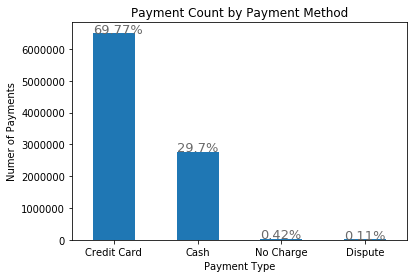

In [159]:
# 1. Plot distribution of payment types

#payment_type is a numeric code signifying how the passenger paid for the trip:

#1=Credit card
#2=Cash
#3=No charge
#4=Dispute

ax = mdf['payment_type'].value_counts().plot(kind='bar')
ax.set_title('Payment Count by Payment Method')
ax.set_xlabel('Payment Type')
ax.set_ylabel('Numer of Payments')
xlabels = ['Credit Card', 'Cash', 'No Charge', 'Dispute']
ax.set_xticklabels(xlabels, rotation=0)

totals = []

for i in ax.patches:
    totals.append(i.get_height())


total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()-.0, i.get_height()+.8, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='dimgrey')



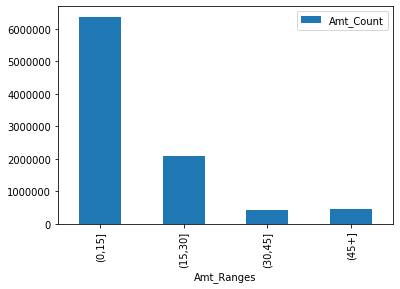

In [160]:
# Plot distribution of total amount
# range1 = 0 - 15.00
# range2 = 15.01 - 30.00
# range3 = 30.01 - 45.00
# range4 = 45.00 + 

ranges = [0,15,30,45]
trip_amt = mdf.total_amount

amt_groups = trip_amt.groupby(pd.cut(trip_amt,ranges)).count()
amt_groups_count = amt_groups.tolist()

plus18 = mdf[mdf['total_amount'] > 45]
plus18_count = len(plus18.index)
amt_groups_count.append(plus18_count)


amt_ranges = ['(0,15]','(15,30]','(30,45]','(45+]']

dx = pd.DataFrame({'Amt_Ranges':amt_ranges, 'Amt_Count':amt_groups_count})

ax = dx.set_index('Amt_Ranges').loc[amt_ranges].plot(kind='bar')

# Most within range of $0 - $15  



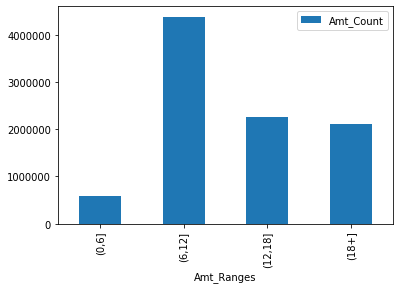

In [161]:
# Plot distribution of total amount
# range1 = 0 - 6.00
# range2 = 6.01 - 12.00
# range3 = 12.01 - 18.00
# range4 = 18.00 + 

ranges = [0,6,12,18]
trip_amt = mdf.total_amount

amt_groups = trip_amt.groupby(pd.cut(trip_amt,ranges)).count()
amt_groups_count = amt_groups.tolist()

plus18 = mdf[mdf['total_amount'] > 18]
plus18_count = len(plus18.index)
amt_groups_count.append(plus18_count)


amt_ranges = ['(0,6]','(6,12]','(12,18]','(18+]']

dx = pd.DataFrame({'Amt_Ranges':amt_ranges, 'Amt_Count':amt_groups_count})

ax = dx.set_index('Amt_Ranges').loc[amt_ranges].plot(kind='bar')

# Within $15, most rides are within $6 and $12


In [162]:
# Most common Pickup locationID's (top 5)
ids = mdf['PULocationID'].value_counts().nlargest(5).index.tolist()
ids
# Most common are: 237, 161, 236, 162, 230


[237, 161, 236, 162, 230]

In [163]:
# Getting the most common Boroughs based on the top 5 common Pickup LocationID's

bor = []

for i in range(len(ids)):
    item = ldf.loc[ldf['LocationID'] == ids[i], 'Borough'].tolist()
    bor.append(item[0])
    
bor

['Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan']

In [164]:
# Getting the zones from the most common Boroughs from Pickup LocationID's

zones = []

for i in range(len(ids)):
    item = ldf.loc[ldf['LocationID'] == ids[i], 'Zone'].tolist()
    zones.append(item[0])
    
zones

# Most common places are Upper East Side South, Midtown Center, Upper East Side North, Midtown East
# and Times Sq/Theatre District


['Upper East Side South',
 'Midtown Center',
 'Upper East Side North',
 'Midtown East',
 'Times Sq/Theatre District']

In [165]:
# Most common Dropoff locationID's (top 5)
ids = mdf['DOLocationID'].value_counts().nlargest(5).index.tolist()
ids
# Most common are: 237, 161, 236, 162, 230

[236, 161, 237, 170, 230]

In [166]:
# Getting the most common Boroughs based on the top 5 common Dropoff LocationID's

bor = []

for i in range(len(ids)):
    item = ldf.loc[ldf['LocationID'] == ids[i], 'Borough'].tolist()
    bor.append(item[0])
    
bor

['Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan']

In [167]:
# Getting the zones from the most common Boroughs from Dropoff LocationID's

zones = []

for i in range(len(ids)):
    item = ldf.loc[ldf['LocationID'] == ids[i], 'Zone'].tolist()
    zones.append(item[0])
    
zones

# Most common places are Upper East Side North, Midtown Center, Upper East Side South, Murray Hill
# and Times Sq/Theatre District


['Upper East Side North',
 'Midtown Center',
 'Upper East Side South',
 'Murray Hill',
 'Times Sq/Theatre District']

In [168]:
# Most common rate codes
rate_code = mdf['RatecodeID'].value_counts().nlargest(5).index.tolist()
rate_code

#1=Standard rate
#2=JFK
#3=Newark
#4=Nassau or Westchester
#5=Negotiated fare
#6=Group ride

[1, 2, 4, 5, 6]

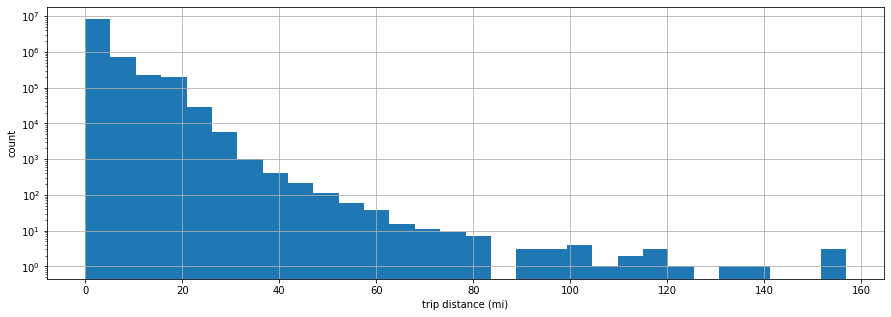

In [169]:
# Distribution of trip distance for taxi rides 


ax = mdf['trip_distance'].hist(bins=30, figsize=(15,5))
ax.set_yscale('log')
ax.set_xlabel("trip distance (mi)")
ax.set_ylabel("count")
plt.show()


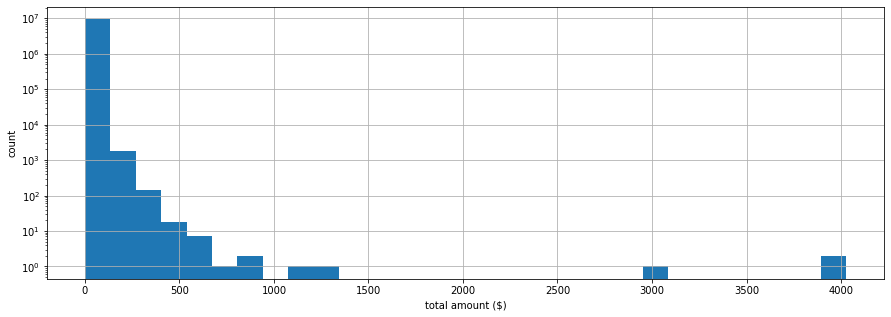

In [170]:
# Distribution of total amount for taxi rides  
ax = mdf['total_amount'].hist(bins=30, figsize=(15,5))
ax.set_yscale('log')
ax.set_xlabel("total amount ($)")
ax.set_ylabel("count")
plt.show()

# remove the ones below 50,000


### Part 3: Descriptive Statistics
#### Basic Analysis: NYC_Transit_Subway_Entrance_And_Exit_Data.csv
Files are of CSV format

In [171]:
# Each subway lines
col_vals = sdf['Line'].values
uniq_vals = np.unique(col_vals)
uniq_vals.tolist()

['4 Avenue',
 '42nd St Shuttle',
 '6 Avenue',
 '63rd Street',
 '8 Avenue',
 'Archer Av',
 'Astoria',
 'Brighton',
 'Broadway',
 'Broadway Jamaica',
 'Broadway-7th Ave',
 'Canarsie',
 'Clark',
 'Concourse',
 'Coney Island',
 'Crosstown',
 'Culver',
 'Dyre Av',
 'Eastern Parkway',
 'Flushing',
 'Franklin',
 'Fulton',
 'Jerome',
 'Lenox',
 'Lexington',
 'Liberty',
 'Myrtle',
 'Nassau',
 'New Lots',
 'Nostrand',
 'Pelham',
 'Queens Boulevard',
 'Rockaway',
 'Sea Beach',
 'West End',
 'White Plains Road']

In [172]:
# Most common subway lines that were used, top 5
sdf['Line'].value_counts().nlargest(5)

8 Avenue            183
Broadway-7th Ave    176
Lexington           147
Queens Boulevard    130
6 Avenue            121
Name: Line, dtype: int64

In [173]:
# What percent of subway lines are exit only stations

entr_type = sdf['Entry'].value_counts().tolist()
yes = entr_type[0]
no = entr_type[1]

total = yes + no

((yes/total)*100, (no/total)*100)
# Entrance v exit subway lines

(93.84368308351178, 6.1563169164882225)

## Part 4: Data Analysis, Visualizations

### Using yellow_tripdata_2018-03.csv


##### Total Amount vs. Passenger Count: Scatter Plot
##### Total Distance vs. Passenger Count: Scatter Plot
##### Trip distance based on locationID (borough)
##### Fare rate per Passenger based on locationID (zones)
##### Peak Hours for Taking Ride





### Total Amount vs. Passenger Count: Scatter Plot

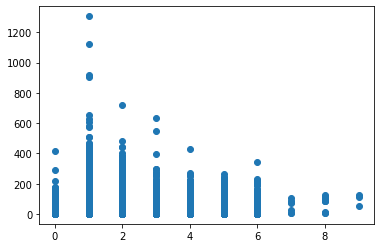

In [174]:
# 1. Total Amount vs. Passenger Count: Scatter Plot, 
# Update data to less than $1500 total amount of spending for better visualization

# Using yellow_tripdata_2018-03.csv data 

data = mdf[mdf.total_amount <= 1500]
plt.scatter(data.passenger_count, data.total_amount)


##### For the scatterplot above, we limited the total amount to below 1500 dollars in order to provide better visualization of the scatter plot for patterns
##### We notice that for the plot above, the more passengers we have, the less variability of cost it has. This tells us that the more passengers we have, their purpose of traveling is generally the same (going to an airport, or to a specific location that is outside of the Manhattan district
In order to provide more clarity for this, let's see the top 5 zones for which the passenger count is higher than 6

In [175]:
# passenger_count > 6 for total amount <= $1500 
belfif = mdf[mdf.total_amount <= 1500]
psgsix = belfif[belfif.passenger_count > 6]

# get ids for pickup + dropoff locations
pids = psgsix['PULocationID'].value_counts().nlargest(5).index.tolist()
dids = psgsix['DOLocationID'].value_counts().nlargest(5).index.tolist()

# get zones for pickup + dropoff locations 
pzones = []
dzones = []

for i in range(len(ids)):
    item = ldf.loc[ldf['LocationID'] == pids[i], 'Zone'].tolist()
    pzones.append(item[0])
    
#pzones = pzones[1:] #drop nan 
pzones


for i in range(len(ids)):
    item = ldf.loc[ldf['LocationID'] == dids[i], 'Zone'].tolist()
    dzones.append(item[0])
    
dzones = dzones[1:] #drop nan 
dzones

(pzones + [" <- pickup , dropoff -> "] + dzones)







['LaGuardia Airport',
 'NV',
 'JFK Airport',
 'East Chelsea',
 'Central Harlem North',
 ' <- pickup , dropoff -> ',
 'Manhattanville',
 'East Village',
 'East Chelsea',
 'LaGuardia Airport']

#### As we see here, LaGuardia, JFK, and East Chelsea are among the common areas for when passengers are greater than 6. This tells us that generally, we want to orient our data to lesser passengers as we want to focus on how to move passengers from the taxis to subways. Based on the graph, we will make the passenger count to 5 or less. 

### Trip Distance vs. Passenger Count: Scatter Plot

##### Based on analysis of the graph in Part 3, we realized that the data for trip distance is highly varied with trip distances that cover across the distance of NYC. Based on google search of a small and large trip distance, we decided to set the benchmark of small trips within 35 miles and longer trips above 35 miles. 

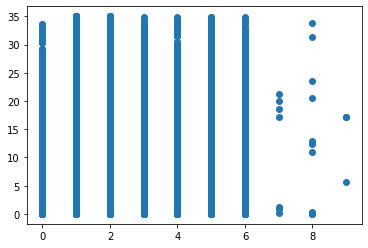

In [176]:
# 2. Trip Distance vs. Passenger Count: Scatter Plot 

# Check between small and long trips 

# Small trips
smalltr = mdf[mdf.trip_distance <= 35]
longtr = mdf[mdf.trip_distance > 35]

plt.scatter(smalltr.passenger_count, smalltr.trip_distance)


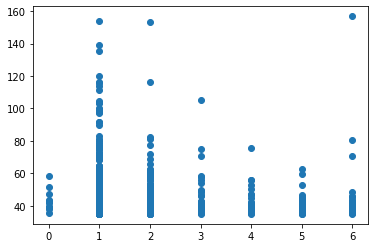

In [177]:
# Long trips 
plt.scatter(longtr.passenger_count, longtr.trip_distance) 

##### Based on the scatterplots above, we can see that for distances above 35 miles, 1 passenger is the most distributed across the distance range. 
##### For distances below 35 miles, it is  distributed almost evenly across 1 - 6 passengers, which only further enhances our conclusion that our dataset for the next portion of our project should be restricted to passengers 5 or less.



### Trip distance based on locationID (borough)

In [178]:
# Using much smaller dataset to perform altair plot
smalls = pd.read_csv('data/yellow_tripdata_2018-03_1-1.csv')
h = smalls.index[smalls['fare_amount']<=0]
smalls.drop(h,inplace=True)
i = smalls.index[smalls['total_amount']<=0]
smalls.drop(i,inplace=True)
j = smalls.index[smalls['mta_tax']<=0]
smalls.drop(j,inplace=True)
k = smalls.index[smalls['tip_amount']<0]
smalls.drop(k,inplace=True)
l = smalls.index[smalls['tolls_amount']<0]
smalls.drop(l,inplace=True)
m = smalls.index[smalls['extra']<0]
smalls.drop(m,inplace=True)
n = smalls.index[smalls['trip_distance']<=0]
smalls.drop(n,inplace=True)

# drop weird total amount values
a = smalls.index[smalls['total_amount']>=50000]
smalls.drop(a,inplace=True)


In [179]:
alt.data_transformers.disable_max_rows()
data = smalls[smalls.trip_distance <= 35]
data = data[['trip_distance','DOLocationID']].copy()
bars = alt.Chart(data).mark_bar().encode(
    alt.Y('trip_distance'),
    alt.X('DOLocationID')
)

bars

alt.Chart(...)

In [180]:
# ldf.loc[ldf['LocationID'] == ids[i], 'Borough'].tolist()
# get borough locations and add it to dataset
locsids = smalls['DOLocationID'].tolist()
borcols = []
for i in range(len(locsids)):
    item = ldf.loc[ldf.LocationID == locsids[i], 'Borough'].tolist()
    borcols.append(item[0])

borcols

smalls['borough'] = borcols

plocsids = smalls['PULocationID'].tolist()
borpcols = []

for i in range(len(plocsids)):
    item = ldf.loc[ldf.LocationID == plocsids[i], 'Borough'].tolist()
    borpcols.append(item[0])

smalls['pborough'] = borpcols


In [181]:

# altair plot for dropoff vs borough
databor = smalls[smalls.trip_distance <= 35]
databor = databor[databor.passenger_count < 6]
databor = databor[['trip_distance','borough']].copy()
bars = alt.Chart(databor).mark_bar().encode(
    alt.Y('trip_distance'),
    alt.X('borough')
)
bars

alt.Chart(...)

In [182]:
# altair plot for pickup vs borough
databor = smalls[smalls.trip_distance <= 35]
databor = databor[databor.passenger_count < 6]
databor = databor[['trip_distance','pborough']].copy()
bars = alt.Chart(databor).mark_bar().encode(
    alt.Y('trip_distance'),
    alt.X('pborough')
)
bars

alt.Chart(...)

##### Based on the graph, we see that the most common dropoff location for a smaller dataset of the original csv is Brooklyn. The most common pickup location is Queens and Manhattan. This tells us that most of the taxi rides are going outside the Manhattan area, and we should focus on subway rides that take us from Manhattan to Brooklyn.  

### Fare rate per Passenger based on locationID (zones)

In [183]:
tdf2 = pd.read_csv('data/yellow_tripdata_2018-03_1-1.csv')


h = tdf2.index[tdf2['fare_amount']<=0]
tdf2.drop(h,inplace=True)
i = tdf2.index[tdf2['total_amount']<=0]
tdf2.drop(i,inplace=True)
j = tdf2.index[tdf2['mta_tax']<=0]
tdf2.drop(j,inplace=True)
k = tdf2.index[tdf2['tip_amount']<0]
tdf2.drop(k,inplace=True)
l = tdf2.index[tdf2['tolls_amount']<0]
tdf2.drop(l,inplace=True)
m = tdf2.index[tdf2['extra']<0]
tdf2.drop(m,inplace=True)
n = tdf2.index[tdf2['trip_distance']<=0]
tdf2.drop(n,inplace=True)

# drop weird total amount values
a = tdf2.index[tdf2['total_amount']>=50000]
tdf2.drop(a,inplace=True)

In [184]:
# first find rate per passenger by creating new column with rate/passenger

rpp = tdf2.fare_amount / tdf2.passenger_count
tdf2['fare_per_passenger'] = rpp

plocsids = tdf2['PULocationID'].tolist()
borpcols = []

#loclist = ldf.LocationID

for i in range(len(plocsids)):
    item = ldf.loc[ldf.LocationID == plocsids[i], 'Borough'].tolist()
    borpcols.append(item[0])

tdf2['pborough'] = borpcols







In [185]:
# column for dborough (destination borough) for rate per passenger dataframe

dlocsids = tdf2['DOLocationID'].tolist()
bordcols = []

#loclist = ldf.LocationID

for i in range(len(dlocsids)):
    item = ldf.loc[ldf.LocationID == dlocsids[i], 'Borough'].tolist()
    bordcols.append(item[0])

tdf2['dborough'] = bordcols

In [186]:
# get zones for each borough
pbor = tdf2.PULocationID.tolist()
zonecols = []

for i in range(len(pbor)):
    item = ldf.loc[ldf.LocationID == pbor[i],'Zone'].tolist()
    zonecols.append(item[0])

tdf2['zone'] = zonecols

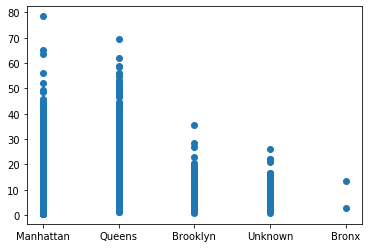

In [187]:
# graph the fare_per passenger based on pickup borough
data = tdf2[tdf2.fare_per_passenger <= 80]
plt.scatter(data.pborough, data.fare_per_passenger)

In [188]:
# most common dropoff by borough

##### From this plot, we can see that Manhattan has the largest fare per passenger rate than the other boroughs. This makes sense since the standard of living in Manhattan is also higher. With our focus on saving money for the rider, this plot shows us that we should focus on creating subway rails that are located within Brooklyn and The Bronx. With most of the destinations going to Brooklyn from our previous graph, this tells us we should focus our subway routes between Manhattan and Brooklyn.  

### Peak Hours for Taking Time

In [189]:
# Convert column to datetime 
mdf['tpep_pickup_datetime'] = pd.to_datetime(mdf['tpep_pickup_datetime'], errors = 'coerce')
tdf2['tpep_pickup_datetime'] = pd.to_datetime(tdf2['tpep_pickup_datetime'], errors = 'coerce')






In [190]:
# Convert to hour:minute:second string
dats = mdf['tpep_pickup_datetime'].dt.strftime('%H/%M/%S')

In [191]:
tdats = tdf2['tpep_pickup_datetime'].dt.strftime('%H/%M/%S')

In [192]:
#extract hours and insert into new column for pickup hours
hours = dats.str.slice(0,2)
hours = hours.astype(str).astype(int)
hours
mdf['hour'] = hours
mdf['hour']

1           0
2           0
4           0
5           0
8           0
           ..
9430371    23
9430372    23
9430373    23
9430374    23
9430375    23
Name: hour, Length: 9336056, dtype: int32

In [193]:
hours = tdats.str.slice(0,2)
hours = hours.astype(str).astype(int)
hours
tdf2['hour'] = hours

Text(0.5, 1.0, 'Taxi Rides Based on Hour of the Day')

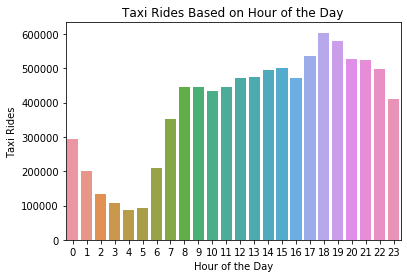

In [194]:
#seaborn plot for taxi rides based on hour

orders = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
ax = sns.countplot(x='hour',data = mdf, order = orders )
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Taxi Rides')
ax.set_title('Taxi Rides Based on Hour of the Day')

##### Based on the plot above, we can see that the most common times for Pickup Taxi Rides is during the night time hours between 6 pm and 10 pm. So we should focus on subway rails that are active at that time.